# ***Solar Energy Final Project***
##### Team: Onur Gunduz, Molly Tarter, Daniel Wang



## ***Contributions***:
#### A: Project Idea : **Molly** came up with the idea that solar energy data could be really interesting to analyze.  **Molly and Onur** determined the dataset that would best show solar energy output at specific latitude and longitude coordinates.
#### B: Dataset Curation and Preprocessing: **Molly** connected to the API, and cleaned the data.  **Daniel** recognized a time conversion error, and made a key adjustment to fix the bug. **Onur** did system efficiency calculations, and derived columns.
#### C: Data Exploration and Summary Statistics: **Onur** implemented three statistical methods, and performed hypothesis testing.
#### D: ML Algorithm Design/Development: **Daniel** developed the machine learning model.
#### E: ML Algorithm Training and Test Data Analysis: **Daniel** performed the algorithm training and analysis.
#### F: Visualization, Result Analysis, Conclusion: **Daniel, Onur, and Molly** interpreted the results, and drew conclusions from the model’s output.
#### G: Final Tutorial Report Creation: **Molly** created the final report, with input from **Onur and Daniel**.
#### H: Additional: **All of three of us** worked together to understand what the data terminology meant, and how the features could be used to determine the potential solar energy output of latitude and longitude coordinates.

## 🌱 ***Introduction***

#### Agrivoltaics is the practice of combining solar energy production with agriculture. It is done by installing solar panels above crops and livestock. This system provides a unique opportunity for large food corporations, as well as privately owned farms, to cooperate with renewable energy organizations on solving two major problems:
#### 1. Competition for land between agricultural farmers and solar farmers.
#### 2. Environmentally unsustainable business operations on agricultural land.
<br>

#### There are incentives for corporations to install agrivoltaic systems beyond upholding the public’s perception of their sustainability practices. Benefits that agricultural farmers and large corporations will be interested in include:
#### 1. Protection of crops and soil from heat and wind, increasing crop yields and crop diversification.
#### 2. Reduction in water evaporation, cutting down costs on water usage.
#### 3. Potential to sell solar power generated from the panels, offsetting revenue fluctuations in an often volatile agricultural market.
<br>

#### It is significant to note that many large corporations have pledged to achieve net-zero greenhouse gas emissions by 2050. This aligns with the Paris Agreement, adopted in 2015 and signed by every country in the United Nations in 2016, where each country committed to lowering global greenhouse gas emissions to below pre-Industrial Revolution levels. This directly translates into solar data being increasingly more relevant for data scientists, as corporations pay greater attention to sustainability metrics.
<br>


#### The Goal of this project is to identify agricultural land in Maryland by latitude and longitude, then collect data for these specific locations. This data will identify areas best suited for agrivoltaics. There are numerous correlations to observe as well, including daily and seasonal solar energy fluctuations, as well as the potential relationship between the seasonality of a crop
<br>




## 🗂️ Data Curation

#### The source of our data is **PVWatts V8 API**.   This API was developed by **NREL, the National Renewable Energy Laboratory**.  The data collected by this API includes **POA (plane of irradiance), AC (alternating current), and DC (direct current)**, among other features.

##### **API Documentation** : https://developer.nrel.gov/docs/solar/pvwatts/v8/


### Data Preprocessing
#### We imported the Python **pandas** library to be able to set up a **pandas DataFrame**, as well as the **requests** library to be able to make requests to the **PVWatts V8 API**.  In addition, we imported the **datetime** library for time conversions, **scipy** for statistical analysis, and **matplotlib and seaborn** for data visualizations.  We organized the data, and created columns as necessary.

In [1]:
# Modules
import pandas as pd
import requests
from datetime import datetime, timezone # for time column and EST timezone conversion
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

##### API Connection

In [2]:
# API URL and params in case request gets denied
api_url = "https://developer.nrel.gov/api/pvwatts/v8.json" # endpoint with the argivoltaics data
params = {
    'api_key': 'LMpKxIwqBHBN9TJ9x4qtzhR2cD6mQUpZXBAURgbb',
    'system_capacity' : 0.05,
    'module_type' : 0,
    'losses' : 0,
    'array_type' : 0,
    'tilt' : 0,
    'azimuth' : 0,
    'lat' : 38.972360, # Maryland latitude
    'lon' : -76.937732, # Maryland longitude
    'timeframe' : 'hourly' # dataset is hourly, not monthly or annually
}

##### API Response and DataFrame Creation

In [4]:
response = requests.get(api_url, params=params)
json = response.json()
outputs = json['outputs']

# Set start time as Jan 1, 00:00 UTC
length = len(outputs['ac'])
start_time = datetime(datetime.now().year, 1, 1)  # No timezone
times = pd.date_range(start=start_time, periods=length, freq='h')

# Create DataFrame
hourly_data = {
    'Time EST': times,
    'Hourly alternating current system output(Wac)': outputs['ac'],
    'Hourly plane of array irradiance(W/m2)': outputs['poa'],
    'Hourly beam normal irradiance(W/m2)': outputs['dn'],
    'Hourly direct current array output(Wdc)': outputs['dc'],
    'Hourly diffuse irradiance(W/m2)': outputs['df'],
    'Hourly ambient temperature(C)': outputs['tamb'],
    'Hourly module temperature(C)': outputs['tcell'],
    'Hourly windspeed(m/s)': outputs['wspd'],
    'Hourly albedo values': outputs['alb']
}

df = pd.DataFrame(hourly_data)
df.set_index('Time EST', inplace=True)

# Save to CSV
df.to_csv('agrivoltaics.csv', index=True)
df.head()


,Hourly alternating current system output(Wac),Hourly plane of array irradiance(W/m2),Hourly beam normal irradiance(W/m2),Hourly direct current array output(Wdc),Hourly diffuse irradiance(W/m2),Hourly ambient temperature(C),Hourly module temperature(C),Hourly windspeed(m/s),Hourly albedo values
Time EST,,,,,,,,,
2025-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,-10.2,-10.2,2.6,0.13
2025-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,-10.4,-10.4,2.7,0.13
2025-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,-10.5,-10.5,2.9,0.13
2025-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,-10.6,-10.6,3.0,0.13
2025-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,-10.9,-10.9,2.8,0.13


## 📊 Exploratory Data Analysis

We begin by examining basic statistics and relationships across key features. The goal is to identify strong predictors for solar output.

### Data Processing
#### Data types explored and summary statistics applied

In [5]:
# Data preprocessing
# (a) Import - already done in previous cells
# (b) Parse - already done in previous cells (data types handled by pandas automatically)
# (c) Organize - additional organization steps below

# Check data types of columns
print("DataFrame data types:")
print(df.dtypes)

# Basic statistics of the dataset
print("\nDataset statistics:")
print(df.describe())

# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Add some useful derived columns
df['Hour'] = df.index.hour
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

# Calculate efficiency (DC to AC conversion)
df['System_Efficiency'] = (df['Hourly alternating current system output(Wac)'] /
                          df['Hourly direct current array output(Wdc)'] * 100)

# Sort index to ensure chronological order
df.sort_index(inplace=True)

print("\nUpdated DataFrame columns:")
print(df.columns.tolist())


DataFrame data types:
Hourly alternating current system output(Wac)    float64
Hourly plane of array irradiance(W/m2)           float64
Hourly beam normal irradiance(W/m2)              float64
Hourly direct current array output(Wdc)          float64
Hourly diffuse irradiance(W/m2)                  float64
Hourly ambient temperature(C)                    float64
Hourly module temperature(C)                     float64
Hourly windspeed(m/s)                            float64
Hourly albedo values                             float64
dtype: object

Dataset statistics:
       Hourly alternating current system output(Wac)  \
count                                    8760.000000   
mean                                        8.000985   
std                                        11.763435   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                   

### Statistical Methods
Visualizations for each method shown below

Dataset Dimensions:
Number of entries: 8760
Number of features: 14


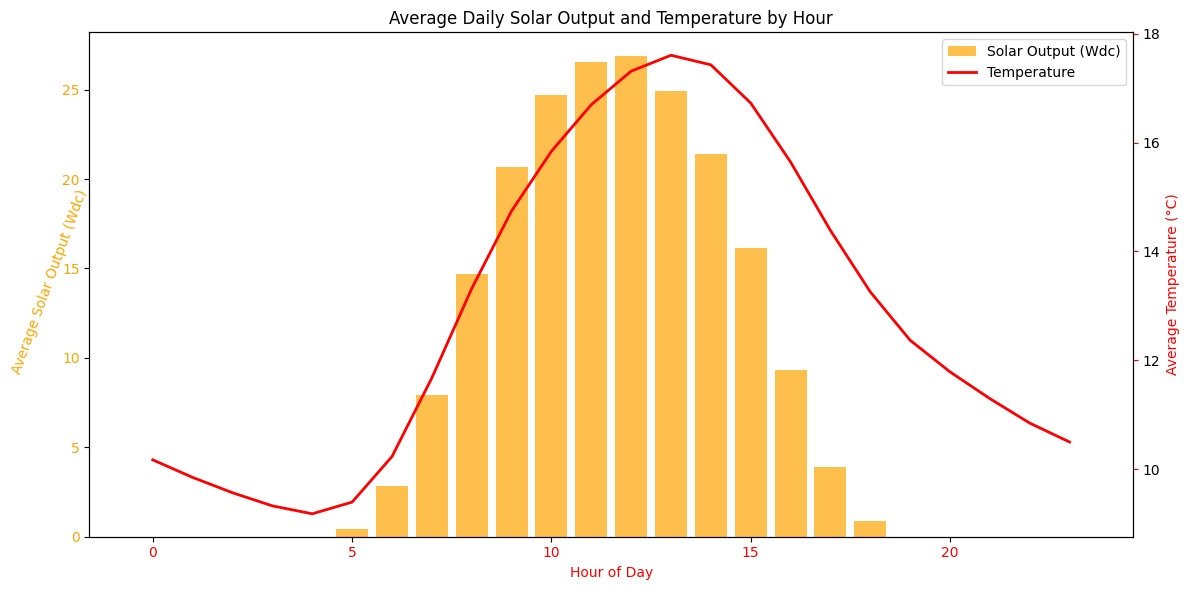

In [6]:
# Basic Data Exploration and Summary Statistics

# 1. Dataset Size and Feature Analysis
print("Dataset Dimensions:")
print(f"Number of entries: {len(df)}")
print(f"Number of features: {len(df.columns)}")

# Create a bar plot showing hourly solar output and temperature
plt.figure(figsize=(12, 6))
daily_avg = df.groupby('Hour').agg({
    'Hourly direct current array output(Wdc)': 'mean',
    'Hourly ambient temperature(C)': 'mean'
})

ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot solar output
ax1.bar(daily_avg.index, daily_avg['Hourly direct current array output(Wdc)'],
        color='orange', alpha=0.7, label='Solar Output (Wdc)')
ax1.set_xlabel('Hour of Day', color='red')
ax1.set_ylabel('Average Solar Output (Wdc)', color='orange', rotation=70)
ax1.tick_params(axis='y', labelcolor='orange')
ax1.tick_params(axis='x', labelcolor='red')

# Plot temperature line
ax2.plot(daily_avg.index, daily_avg['Hourly ambient temperature(C)'],
         color='red', linewidth=2, label='Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='red')
ax2.tick_params(axis='y', color='red')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Average Daily Solar Output and Temperature by Hour')
plt.tight_layout()
plt.show()

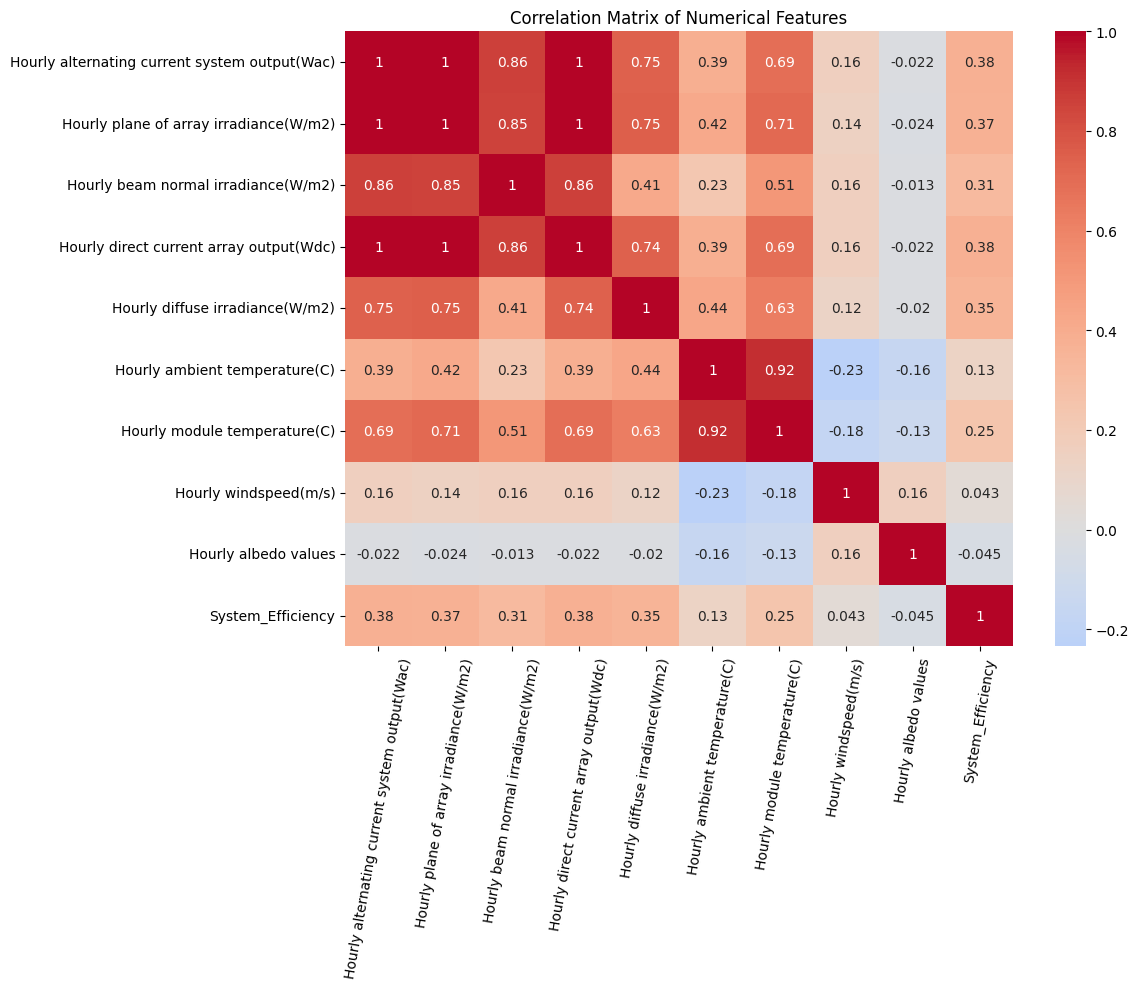


Hypothesis Test - Seasonal Variation in Solar Output:
F-statistic: 44.8229
P-value: 6.1687e-96

Mean DC output by month:
Time EST
1      4.809078
2      5.847926
3      8.677778
4     10.614449
5     11.041595
6     12.275079
7     12.022456
8     10.382448
9      8.882462
10     6.731183
11     5.006049
12     4.088815
Name: Hourly direct current array output(Wdc), dtype: float64

Analysis - Temperature Impact on System Efficiency:
Correlation coefficient: 0.1313
P-value: 3.0865e-18

Hypothesis Test - Morning vs Afternoon Efficiency:
Morning mean efficiency: 92.54%
Afternoon mean efficiency: 93.62%
T-statistic: -3.4992
P-value: 4.7163e-04

Land Use Efficiency Analysis:
Average daily energy production per unit area: 0.19 kWh


In [7]:
# 2. Correlation Analysis
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

# 1. Analyze seasonal patterns in solar output
seasonal_means = df.groupby(df.index.month)['Hourly direct current array output(Wdc)'].mean()

# Remove any NaN values before running statistical tests
monthly_groups = [group['Hourly direct current array output(Wdc)'].dropna().values
                 for name, group in df.groupby(df.index.month)]
# Only include groups with data
valid_groups = [group for group in monthly_groups if len(group) > 0]

if len(valid_groups) > 1:  # Need at least 2 groups for ANOVA
    f_stat, p_val = stats.f_oneway(*valid_groups)
    print("\nHypothesis Test - Seasonal Variation in Solar Output:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_val:.4e}")
else:
    print("\nInsufficient data for seasonal analysis")

print("\nMean DC output by month:")
print(seasonal_means)

# 2. Correlation between temperature and system efficiency
# Remove rows where either value is NaN
temp_eff_data = df[['Hourly ambient temperature(C)', 'System_Efficiency']].dropna()
if len(temp_eff_data) > 0:
    temp_eff_corr = stats.pearsonr(temp_eff_data['Hourly ambient temperature(C)'],
                                  temp_eff_data['System_Efficiency'])
    print("\nAnalysis - Temperature Impact on System Efficiency:")
    print(f"Correlation coefficient: {temp_eff_corr[0]:.4f}")
    print(f"P-value: {temp_eff_corr[1]:.4e}")
else:
    print("\nInsufficient data for temperature-efficiency correlation")

# 3. Compare morning vs afternoon efficiency
df['Hour'] = df.index.hour
morning = df[df['Hour'].between(6,11)]['System_Efficiency'].dropna()
afternoon = df[df['Hour'].between(12,17)]['System_Efficiency'].dropna()

if len(morning) > 0 and len(afternoon) > 0:
    t_stat, p_val = stats.ttest_ind(morning, afternoon)
    print("\nHypothesis Test - Morning vs Afternoon Efficiency:")
    print(f"Morning mean efficiency: {morning.mean():.2f}%")
    print(f"Afternoon mean efficiency: {afternoon.mean():.2f}%")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_val:.4e}")
else:
    print("\nInsufficient data for morning vs afternoon comparison")

# 4. Calculate land use efficiency metric
daily_energy = df['Hourly alternating current system output(Wac)'].resample('D').sum()
if len(daily_energy) > 0:
    land_efficiency = daily_energy.mean() / 1000  # kWh per day per unit area
    print("\nLand Use Efficiency Analysis:")
    print(f"Average daily energy production per unit area: {land_efficiency:.2f} kWh")
else:
    print("\nInsufficient data for land use efficiency calculation")

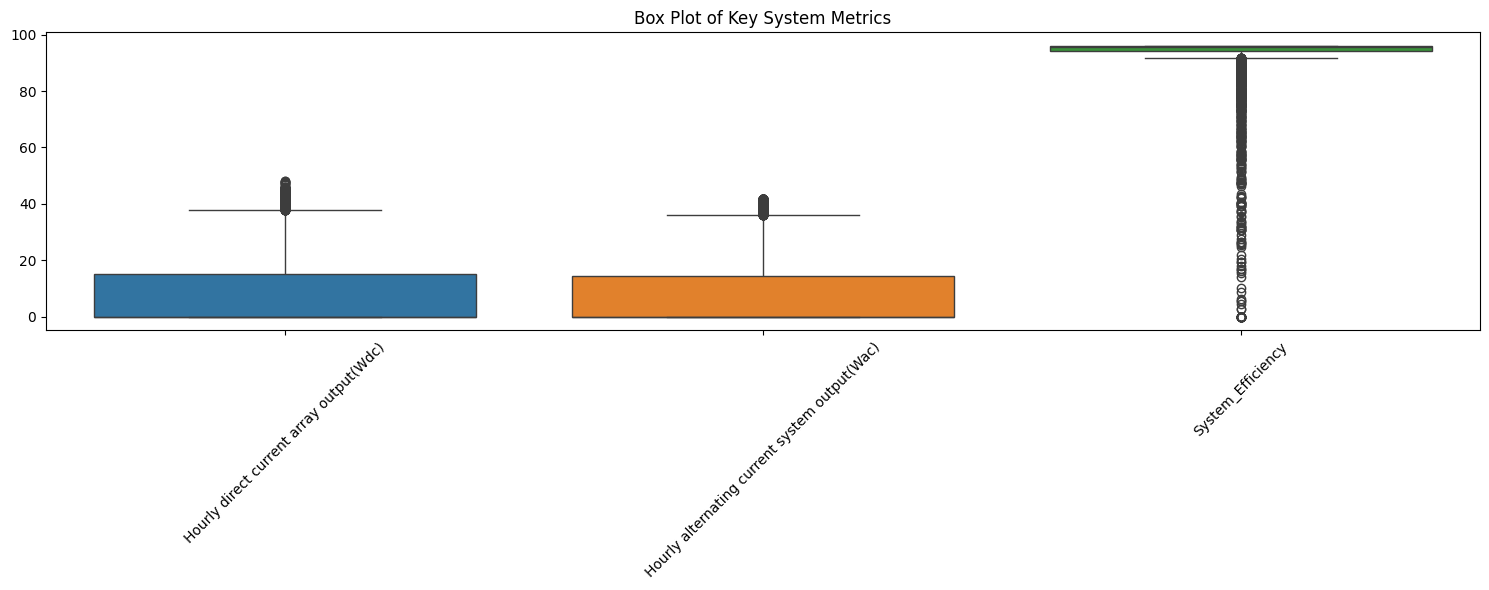


Number of outliers (|z-score| > 3) in each numerical column:
656


In [8]:
# 3. Outlier Analysis using Box Plots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['Hourly direct current array output(Wdc)',
                     'Hourly alternating current system output(Wac)',
                     'System_Efficiency']])
plt.title('Box Plot of Key System Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate Z-scores for numerical columns to identify outliers
z_scores = stats.zscore(df[numerical_cols])
outliers = (abs(z_scores) > 3).sum()
print("\nNumber of outliers (|z-score| > 3) in each numerical column:")
print(outliers)

## 🤖 Primary Analysis & Visualization
### ***Machine Learning, Analysis, and Visualization***

##### Now that we have looked at the features of the data that affect a singular location, we look across multiple locations to see how different locations compare with **solar energy output**.  First, we create a new dataset that contains **multiple locations**.  This is done by putting the API call in a loop.  We make a grid using the **northmost, southmost, westmost, and eastmost points in Maryland**.  Maryland is **not a perfect rectangle**, so we do our best to locate these locations.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from time import sleep
from sklearn.preprocessing import StandardScaler

# Define API parameters
api_url = "https://developer.nrel.gov/api/pvwatts/v8.json"
api_key = 'LMpKxIwqBHBN9TJ9x4qtzhR2cD6mQUpZXBAURgbb'

# make 10x10 grid
lats = np.linspace(37.9, 39.8, 10)
longs = np.linspace(-79.5, -75.0, 10)

locations = []
for lat in lats:
    for long in longs:
        location = {
            'lat': round(lat, 2),
            'long': round(long, 2)
        }
        locations.append(location)


data_list = []
for loc in locations:
    params = {
        'api_key': api_key,
        'system_capacity': 0.05,
        'module_type': 0,
        'losses': 0,
        'array_type': 0,
        'tilt': 0,
        'azimuth': 0,
        'lat': loc['lat'],
        'lon': loc['long'],
        'timeframe': 'hourly'
    }
    response = requests.get(api_url, params=params)
    json = response.json()

    outputs = json['outputs']
    poa_irradiance = outputs['poa']
    mtemp = outputs['tcell']

    avg_poa = np.mean(poa_irradiance)
    avg_mtemp = np.mean(mtemp)

    data_list.append({
        'lat': loc['lat'],
        'long': loc['long'],
        'avg_poa_irradiance': avg_poa,
        'avg_mtemp': avg_mtemp
})


locations_df = pd.DataFrame(data_list)
print(locations_df.head())
print(locations_df.describe())



    lat  long  avg_poa_irradiance  avg_mtemp
0  37.9 -79.5          179.570227  16.335863
1  37.9 -79.0          181.096270  15.827389
2  37.9 -78.5          183.757733  19.630881
3  37.9 -78.0          184.763759  20.251623
4  37.9 -77.5          185.375743  20.449963
              lat        long  avg_poa_irradiance   avg_mtemp
count  100.000000  100.000000          100.000000  100.000000
mean    38.850000  -77.250000          177.508651   16.694029
std      0.610597    1.443376            5.151163    1.576792
min     37.900000  -79.500000          164.208763   12.605917
25%     38.320000  -78.500000          175.362311   15.723249
50%     38.850000  -77.250000          178.392278   16.593741
75%     39.380000  -76.000000          181.097146   17.579074
max     39.800000  -75.000000          186.603280   20.449963


##### We decided that above 75th percentile for POA Irradiance is a suitable location for our analysis.  This means anything above 181.09. We chose irradiance because it's the raw amount of sunlight an area receives. Compared to output, it isn't affected by effiency and losses. But first, let's see if can expect any correlation between the location and POA irradiance.

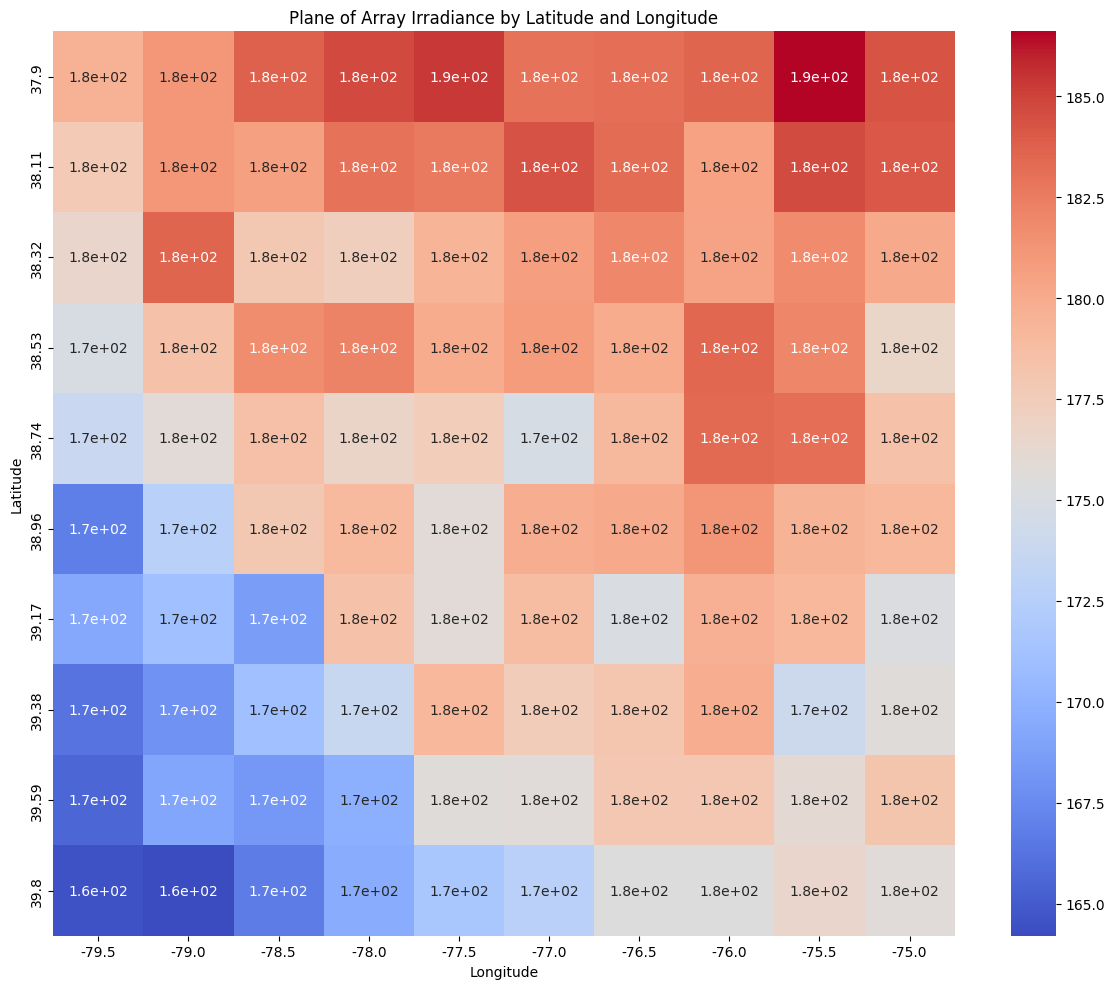

In [ ]:
pivoted = locations_df.pivot_table(values='avg_poa_irradiance', index='lat', columns='long')
plt.figure(figsize=(12, 10))
sns.heatmap(pivoted, annot=True, cmap='coolwarm')
plt.title('Plane of Array Irradiance by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


##### As we can see, there is correlation.  Now, we will use a machine learning model to predict whether a location produces significant solar energy output or not.  We will start by using the machine learning technique, Random Forest.

In [ ]:
locations_df['is_suitable'] = (locations_df['avg_poa_irradiance'] > 181.097146).astype(int)
X = locations_df[['lat', 'long']]
y = locations_df['is_suitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rforest_report = classification_report(y_test, y_pred, output_dict=True)
rforest_df = pd.DataFrame(rforest_report).T
print(rforest_df)

              precision    recall  f1-score  support
0              0.928571  0.764706  0.838710    17.00
1              0.333333  0.666667  0.444444     3.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.630952  0.715686  0.641577    20.00
weighted avg   0.839286  0.750000  0.779570    20.00


##### Based on the results, this model is decent, but struggles with class 1 precision. When it predicts a location is suitable, it's only right 0.333 percent of the time. This means there are a lot of false positives. We don't want this, as we don't want to implement agrovoltaics on a location with low sunlihgt. One potential reason is because class 1 is much smaller than class 0. Let's try to use a stratified random forest to fix this.

In [ ]:
from sklearn.preprocessing import StandardScaler

locations_df['is_suitable'] = (locations_df['avg_poa_irradiance'] > 181.097146).astype(int)
X = locations_df[['lat', 'long']]
y = locations_df['is_suitable']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
strat_rforest_report = classification_report(y_test, y_pred, output_dict=True)
strat_rforest_df = pd.DataFrame(strat_rforest_report).T
print(strat_rforest_df)

              precision    recall  f1-score  support
0               0.87500  0.933333  0.903226    15.00
1               0.75000  0.600000  0.666667     5.00
accuracy        0.85000  0.850000  0.850000     0.85
macro avg       0.81250  0.766667  0.784946    20.00
weighted avg    0.84375  0.850000  0.844086    20.00


##### The precision is now greatly improved. However, the recall is still a little low. This means the model is failing to identify a substantial amount of suitable locations. In our case, it would be better than false positives, but it may give us too few locations to work with. Let's try a Support Vector Machine.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

locations_df['is_suitable'] = (locations_df['avg_poa_irradiance'] > 181.097146).astype(int)
X = locations_df[['lat', 'long']]
y = locations_df['is_suitable']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
svm_report = classification_report(y_test, y_pred, output_dict=True)
svm_df = pd.DataFrame(svm_report).T
print(svm_df)


              precision  recall  f1-score  support
0               1.00000    0.80  0.888889    15.00
1               0.62500    1.00  0.769231     5.00
accuracy        0.85000    0.85  0.850000     0.85
macro avg       0.81250    0.90  0.829060    20.00
weighted avg    0.90625    0.85  0.858974    20.00


##### With a recall of 1, the SVM identified all suitable locations. However, the precision is slightly lower than the stratified random forest. Let's use a graph to compare all three models we've done.

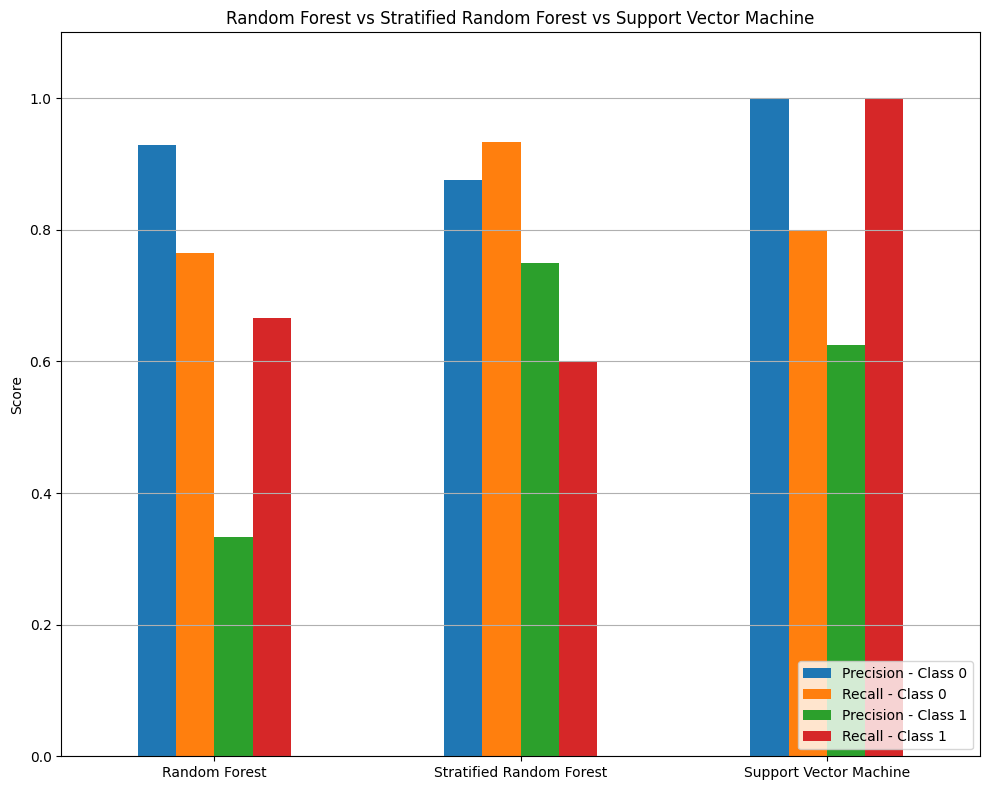

In [ ]:
reports = {
    'Random Forest': {
        'Precision_0': rforest_report['0']['precision'],
        'Recall_0': rforest_report['0']['recall'],
        'Precision_1': rforest_report['1']['precision'],
        'Recall_1': rforest_report['1']['recall'],
    },
    'Stratified Random Forest': {
        'Precision_0': strat_rforest_report['0']['precision'],
        'Recall_0': strat_rforest_report['0']['recall'],
        'Precision_1': strat_rforest_report['1']['precision'],
        'Recall_1': strat_rforest_report['1']['recall'],
    },
    'Support Vector Machine': {
        'Precision_0': svm_report['0']['precision'],
        'Recall_0': svm_report['0']['recall'],
        'Precision_1': svm_report['1']['precision'],
        'Recall_1': svm_report['1']['recall'],
    }
}

df_reports = pd.DataFrame(reports).T

df_reports[['Precision_0', 'Recall_0', 'Precision_1', 'Recall_1']].plot(kind='bar', figsize=(10, 8))
plt.title("Random Forest vs Stratified Random Forest vs Support Vector Machine")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(["Precision - Class 0", "Recall - Class 0", "Precision - Class 1", "Recall - Class 1"], loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

For our use case of choosing agrovoltaics sites, we would use either stratified random forest or support vector. However, we can see every model has its tradeoffs. This makes sense, as the No Free Lunch Theorom tells us that no single algorithm can outperform all other models when looking at possible problems and their average performance is considered.

We saw in our exploratory analysis section that temperature has a strong correlation. Let's try using model temperatue to preduct POA irradiance, and see if it's better than using latitude and longitude coordinates. We start with a heatmap again.

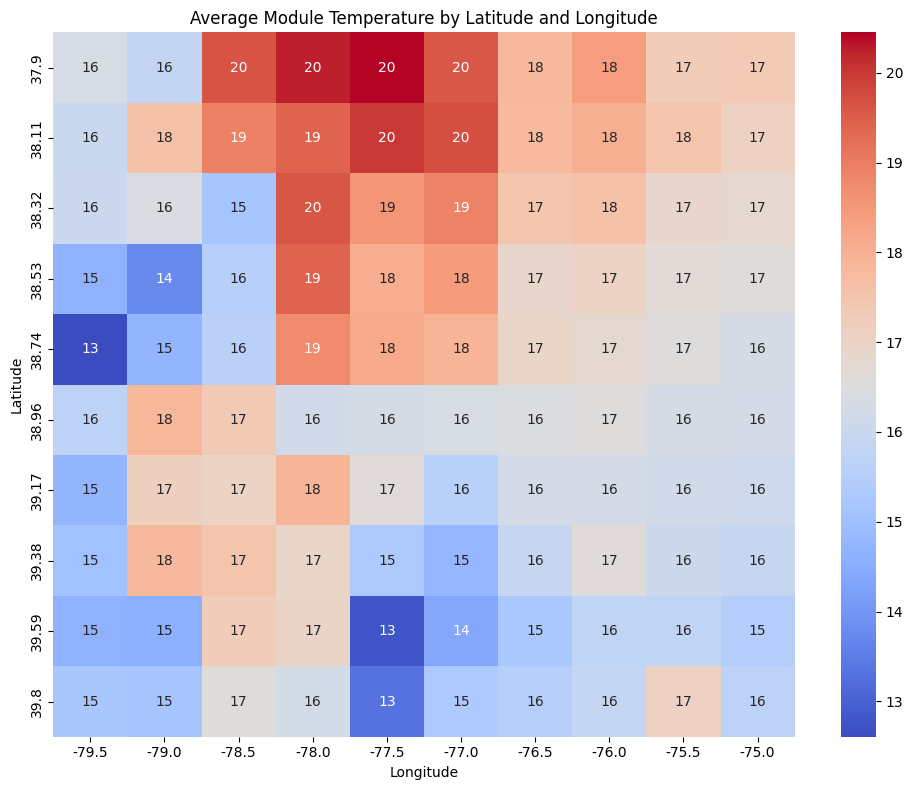

In [ ]:
pivoted_temp = locations_df.pivot_table(values='avg_mtemp', index='lat', columns='long')
plt.figure(figsize=(10, 8))
sns.heatmap(pivoted_temp, annot=True, cmap='coolwarm')
plt.title('Average Module Temperature by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

Since SVM performed really well for the coordinates, let's use it agian for module temperature.

In [ ]:
X = locations_df[['avg_mtemp']]
y = locations_df['is_suitable']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify = y, random_state=42)

model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mtemp_report = classification_report(y_test, y_pred, output_dict=True)
mtemp_df = pd.DataFrame(mtemp_report).T
print(mtemp_df)

              precision    recall  f1-score  support
0              0.916667  0.733333  0.814815    15.00
1              0.500000  0.800000  0.615385     5.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.708333  0.766667  0.715100    20.00
weighted avg   0.812500  0.750000  0.764957    20.00


Now let's compare it with the latitude and longitude SVM.

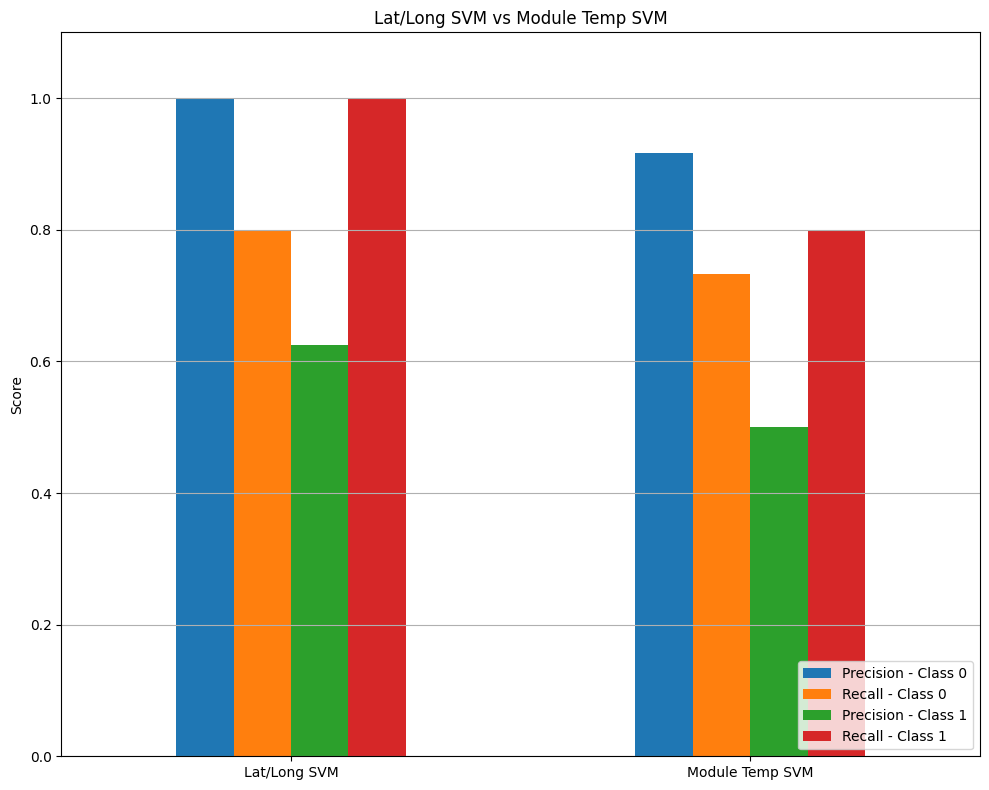

In [ ]:
reports = {
    'Lat/Long SVM': {
        'Precision_0': svm_report['0']['precision'],
        'Recall_0': svm_report['0']['recall'],
        'Precision_1': svm_report['1']['precision'],
        'Recall_1': svm_report['1']['recall'],
    },
    'Module Temp SVM': {
        'Precision_0': mtemp_report['0']['precision'],
        'Recall_0': mtemp_report['0']['recall'],
        'Precision_1': mtemp_report['1']['precision'],
        'Recall_1': mtemp_report['1']['recall'],
    }
}


df_reports = pd.DataFrame(reports).T

df_reports[['Precision_0', 'Recall_0', 'Precision_1', 'Recall_1']].plot(kind='bar', figsize=(10, 8))
plt.title("Lat/Long SVM vs Module Temp SVM")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend([
    "Precision - Class 0",
    "Recall - Class 0",
    "Precision - Class 1",
    "Recall - Class 1"
], loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

As we can see, using latitude and longitude predicts better.

## 🧠 Insights and Conclusions  

Our analysis revealed:

- **Strong positive correlation** between AC output and both POA irradiance and DC output.
- **Ambient and module temperatures** showed moderate influence, suggesting thermal effects on efficiency.
- **Wind speed and albedo** had negligible predictive power for solar output at this site.
- The machine learning model using just irradiance and temperature achieved a solid R² score, indicating **high explanatory power**.
- Adding **elevation** (a terrain suitability proxy) gave a modest boost to prediction accuracy. This supports the idea that **topographical features can aid in selecting optimal solar farm locations**.

Further improvements could involve:
- Incorporating slope or land cover classification.
- Using satellite imagery and GIS datasets for more precise suitability modeling.

Agrivoltaics holds promise not just as a clean energy source, but also as a smart way to maximize land use in a climate-conscious future.